<a href="https://colab.research.google.com/github/DhafinRA/ML-Upatik/blob/main/Food_Classification_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/Dataset/Train/Ayam\ Goreng/"9.jpg"

'/content/drive/MyDrive/Dataset/Train/Ayam Goreng/9.jpg'


In [ ]:
import random
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

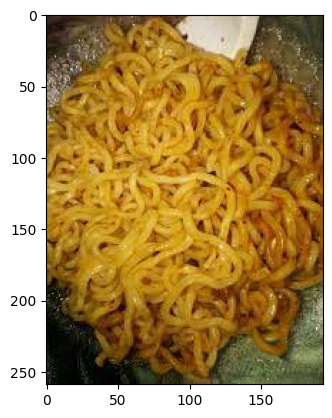

In [ ]:
# Read Images
img = mpimg.imread('/content/drive/MyDrive/Dataset/Test/Mie Instan/mie81.jpg')

# Output Images
plt.imshow(img)

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                            horizontal_flip=True,
                                                            vertical_flip=True,
                                                            rotation_range=60,
                                                            width_shift_range=0.8,
                                                            height_shift_range=0.8,)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

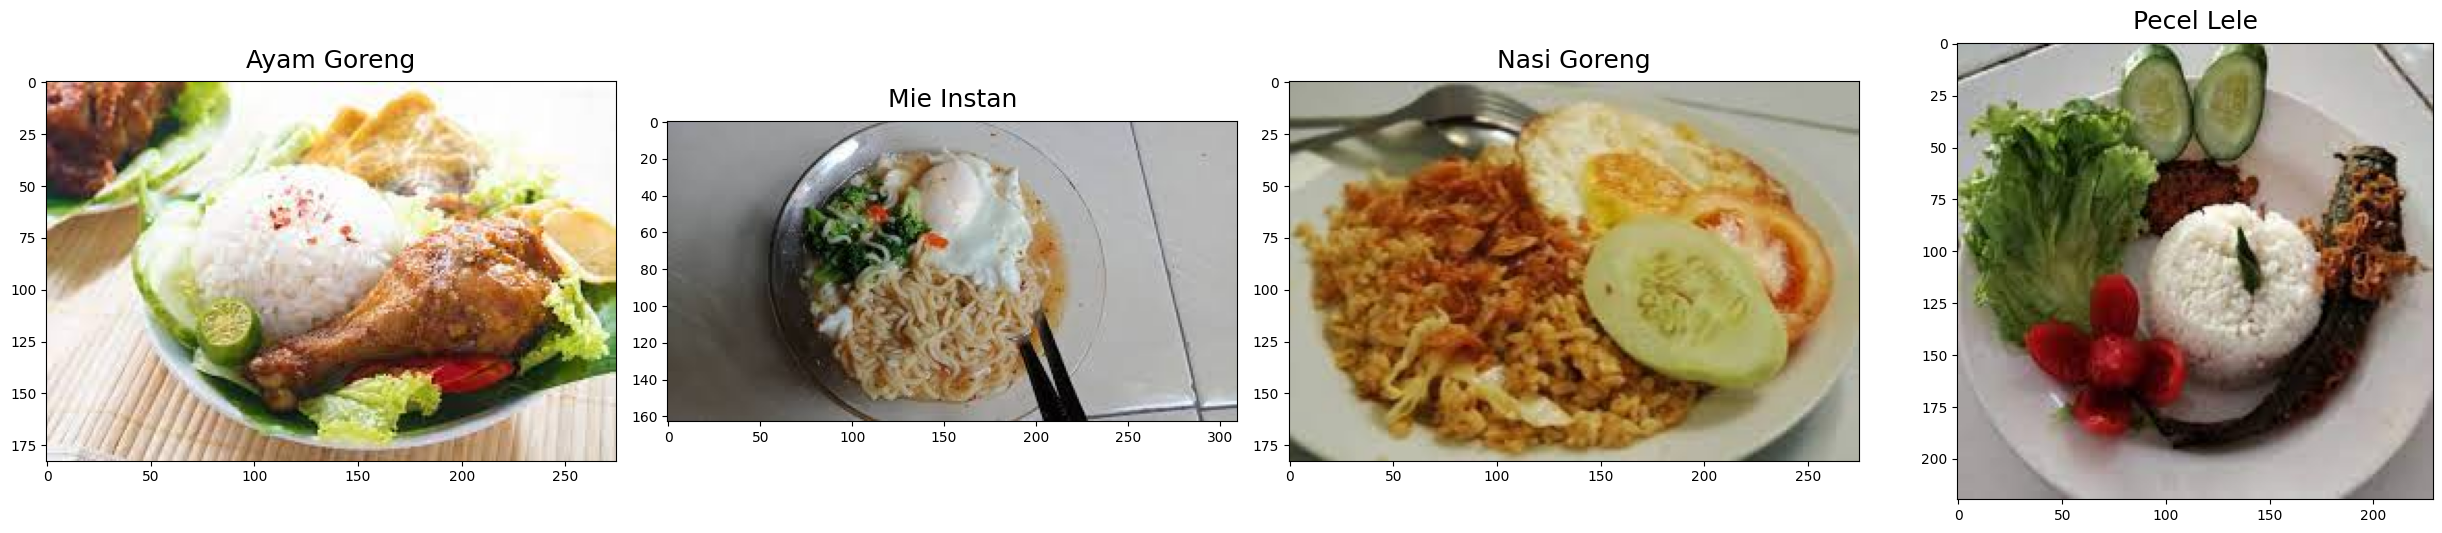

In [ ]:
train_dir = "/content/drive/MyDrive/Dataset/Train"
test_dir = "/content/drive/MyDrive/Dataset/Test"
images = []

for food_folder in sorted(os.listdir(train_dir)):
    food_items = os.listdir(train_dir + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_dir,food_folder,food_selected))

fig=plt.figure(1, figsize=(25, 25))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)

plt.tight_layout()

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150, 150),
                                                    batch_size=2,
                                                    class_mode='categorical')

Found 319 images belonging to 4 classes.
Found 82 images belonging to 4 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history = model.fit_generator(train_generator,epochs=20,validation_data=test_generator)

Epoch 1/20


<ipython-input-36-bfb2e8413dc5>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=20,validation_data=test_generator)


32/32 [==============================] - 6s 121ms/step - loss: 1.9078 - accuracy: 0.2696 - val_loss: 1.3834 - val_accuracy: 0.2439
Epoch 2/20
32/32 [==============================] - 4s 140ms/step - loss: 1.4109 - accuracy: 0.2445 - val_loss: 1.3915 - val_accuracy: 0.3293
Epoch 3/20
32/32 [==============================] - 4s 114ms/step - loss: 1.4061 - accuracy: 0.2571 - val_loss: 1.4803 - val_accuracy: 0.2561
Epoch 4/20
32/32 [==============================] - 3s 102ms/step - loss: 1.4105 - accuracy: 0.3166 - val_loss: 1.3912 - val_accuracy: 0.2317
Epoch 5/20
32/32 [==============================] - 4s 138ms/step - loss: 1.3975 - accuracy: 0.3197 - val_loss: 1.3676 - val_accuracy: 0.2927
Epoch 6/20
32/32 [==============================] - 3s 103ms/step - loss: 1.4095 - accuracy: 0.2790 - val_loss: 1.3772 - val_accuracy: 0.2439
Epoch 7/20
32/32 [==============================] - 3s 105ms/step - loss: 1.4121 - accuracy: 0.2571 - val_loss: 1.3742 - val_accuracy: 0.2195
Epoch 8/20
32/32 

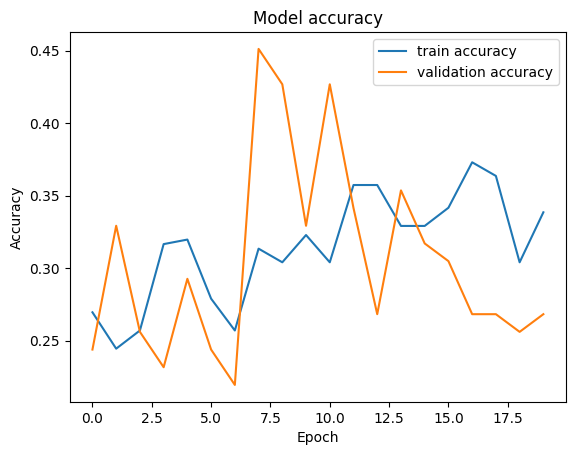

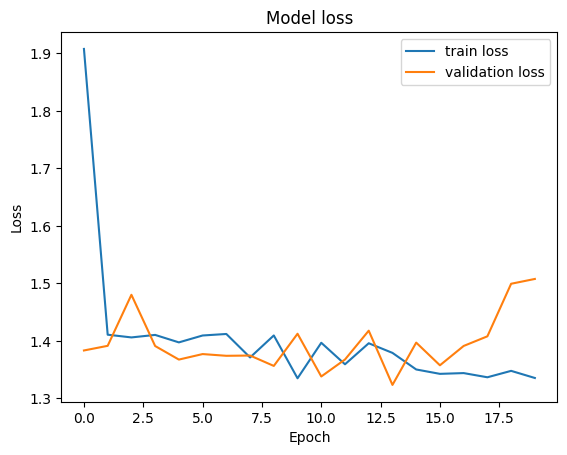

In [ ]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()

plot_accuracy(history)
plot_loss(history)